# Dimensionality reduction

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from numpy import *
import seaborn as sns
sns.set_context("notebook", font_scale=1.4)
sns.set_style("whitegrid")
from IPython.core.pylabtools import figsize, getfigs
from IPython.core.display import HTML
css_file = '../../my.css'
HTML(open(css_file, "r").read())

Despite much progress in recent centuries, infectious disease continues to be one of humanity's most persistent problems. To understand and ultimately contain infectious diseases, it is helpful to understand how the human immune system responds to them, especially at the cellular and molecular level.

In a recent study a cohort of 16 healthy human volunteers received intranasal inoculation of influenza H3N2/Wisconsin and 9 of these subjects developed mild to severe symptoms based on standardized symptom scoring [1]. In the week following inoculation, the patient's blood was drawn every 8 hours for microarray analysis. The resulting dataset contains 268 samples: 16 patients and about 17 samples from each patient. Patients were classified as "asymptomatic" if the Jackson score (which is a symptom score that indicates actual infection) was less than 6 over the first five days of observation and viral shedding was not documented after the first 24 hours subsequent to inoculation. The other patients were labeled "symptomic".

I this practical session we will analyse this data set unsupervised. We will chart the course of flu infection and try to identify genes that are involved.

> [1] Huang, Yongsheng, et al. Temporal dynamics of host molecular responses differentiate symptomatic and asymptomatic influenza A infection. PLoS genetics 7.8 (2011).

Let's start by loading the data.

In [100]:
data = pd.read_csv("flu.csv")

In [101]:
data.head(5)

,10002_at,10003_at,10004_at,10005_at,10006_at,10007_at,10009_at,1000_at,10010_at,10013_at,...,9991_at,9992_at,9993_at,9994_at,9997_at,999_at,9_at,subject,type,time
0,0.032525,0.015096,-0.274163,-0.333238,-0.133675,0.029634,0.041531,0.112252,-0.025757,0.117923,...,-0.098528,0.000522,-0.119943,-0.150252,-0.844311,0.013486,-0.472906,1,symptomatic,0
1,-0.063798,-0.054563,-0.044692,-0.251884,-0.080583,-0.360632,-0.020238,-0.094011,0.082352,0.196478,...,0.033788,-0.111438,-0.163886,0.286530,-0.773889,-0.000414,-0.254953,1,symptomatic,1
2,0.197434,0.106990,0.004244,-0.214974,-0.339999,-0.270067,0.055495,0.068424,-0.113263,0.220205,...,0.002347,0.060106,-0.291948,-0.177728,-1.022652,-0.000998,-0.733726,1,symptomatic,2
3,-0.038433,0.040574,0.015154,-0.245311,-0.053418,-0.070803,0.271969,-0.142061,0.229480,-0.002120,...,0.196170,-0.194425,-0.215175,0.089734,-0.814457,0.028076,-0.471819,1,symptomatic,3
4,0.044036,-0.111893,0.314011,0.030471,-0.031469,-0.014274,0.003590,-0.079671,0.371623,0.051905,...,-0.099031,-0.098094,-0.401844,0.087698,-0.295871,0.061729,0.068946,1,symptomatic,4


The microarray used in this study measures 11959 gene expression values. There are three more columns in the data set:

- 'subject': identifies the volunteer
- 'type': the symptom annotation
- 'time': the timepoint of the microarray measurement

Plot a boxplot of the first 100 genes.

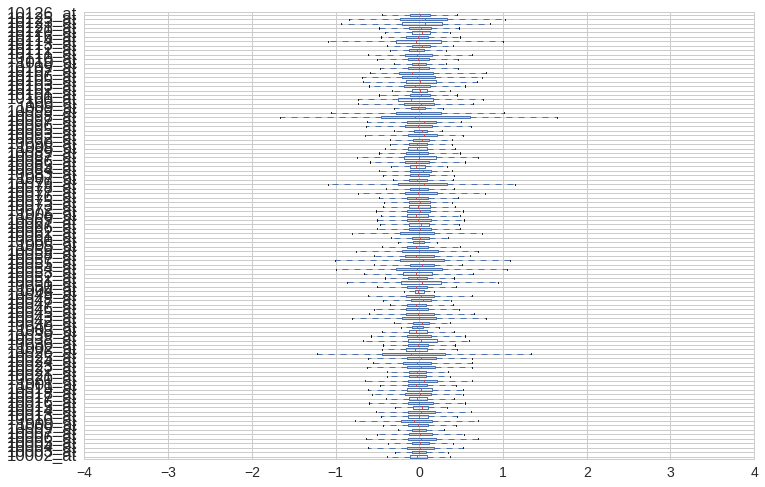

In [102]:
# solution !!
plt.figure(figsize=(12,8))
data.iloc[:,:100].boxplot(vert=False)
plt.show()

We will be using PCA to analyze this data set. Should we normalize this data set?

Let's plot a heatmap of some of the genes for subject 2. 

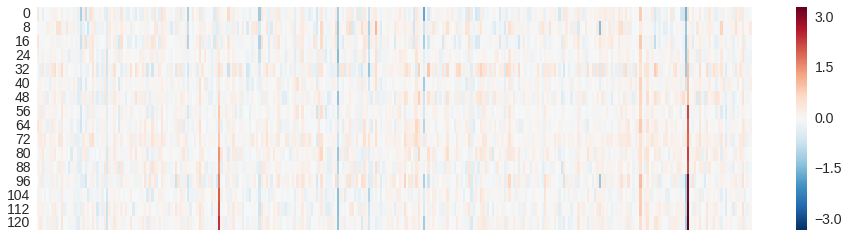

In [103]:
plt.figure(figsize=(16,4))
sns.heatmap(pd_data[data.subject==2].iloc[:,200:500],square=False,xticklabels=False,yticklabels=range(0,128,8))
plt.show()

In this heatmap the genes are on the x-axis, the time (in houres) is on the y-axis. The color levels indicate the expression measurements of the genes. Do you see something interesting? Yes? Good then you understand the plot. Now make the exact same plot for subject 1.

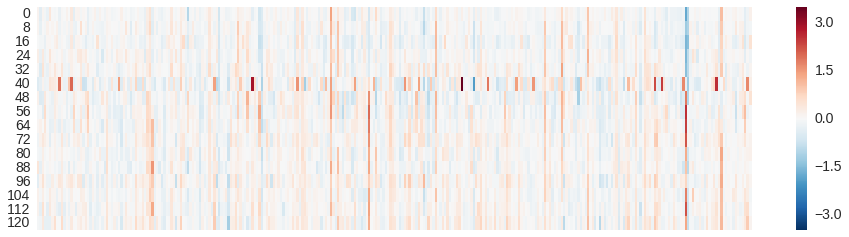

In [104]:
plt.figure(figsize=(16,4))
sns.heatmap(pd_data[data.subject==1].iloc[:,200:500],square=False,xticklabels=False,yticklabels=range(0,128,8))
plt.show()

Do you see a strange measurement? Maybe an outlier?

Pop the column 'subject' in a variable called `subjects`. Pop the column 'type' in a variable called`types`. Pop the column 'time' in a variable called `times`. 

In [105]:
# solution !!

subjects = data.pop('subject')
types = data.pop('type')
times = data.pop('time')

Apply PCA on the data set `data` to reduce the 11959 genes (the features) to just 2 principle components. Store the 2 principle components in a pandas dataframe called `data_projected`.

In [106]:
# solution !!
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_projected = pd.DataFrame(pca.fit_transform(data),columns=['PC1','PC2'])

Add the variables `subjects`, `types` and `times` as columns to dataframe `data_projected`.

In [107]:
# solution !!
data_projected['subject'] = subjects
data_projected['type'] = types
data_projected['time'] = times

Use the seaborn `lmplot()` function to plot the 2 principle components.

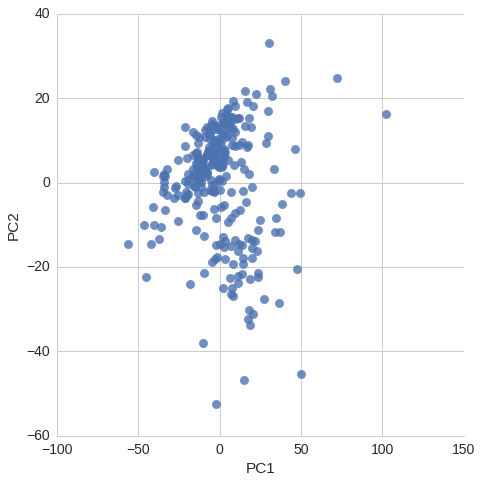

In [108]:
# solution !!
sns.lmplot(x="PC1",y="PC2",data=data_projected, fit_reg=False, size=7, scatter_kws={"s": 80})
plt.show()

Make the same plot but split the it by 'type'.

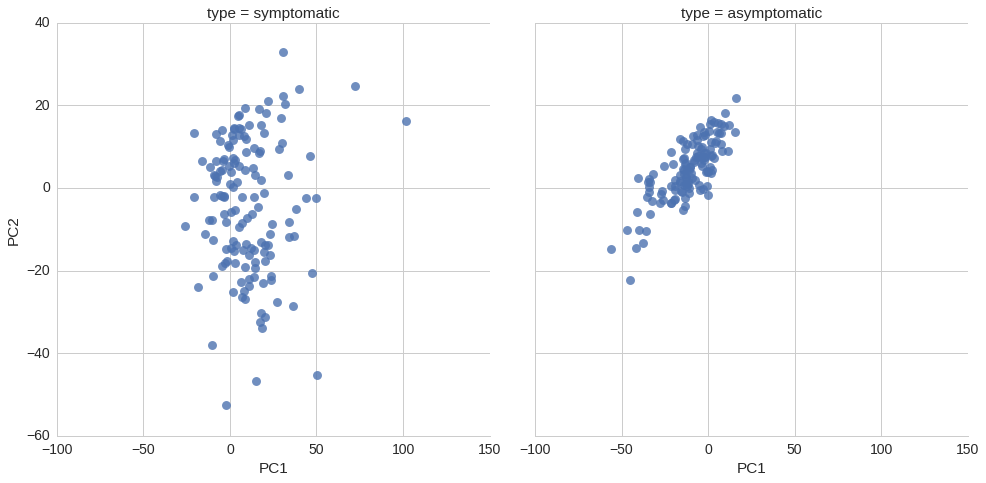

In [109]:
# solution !!
data_projected['type'] = types
sns.lmplot(x="PC1",y="PC2",data=data_projected, col='type', fit_reg=False, size=7, scatter_kws={"s": 80})
plt.show()

What do you see?

Color the microarray measurements by 'subject'.

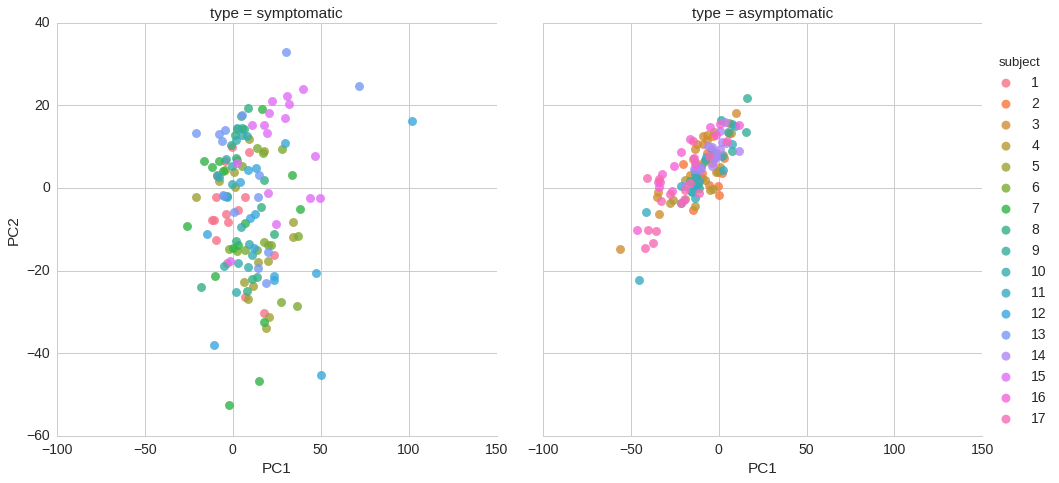

In [110]:
# solution !!
data_projected['subject'] = subjects
sns.lmplot(x="PC1",y="PC2",data=data_projected, col='type', hue='subject', fit_reg=False, size=7, scatter_kws={"s": 80})
plt.show()

Do the volunteers cluster together? 

The first 2 principle components can separate many of the symptomic subjects from the asymptomic ones. However, not all of them. 

Let's take a look at we have found. We could say that we reduced the 11959 genes to just two genes, maybe we can call them eigengenes. These 2 eigengenes explain most of the variation observed over all subjects and time points. However, the eigengenes will be orthogonal to each other. This means the behavior of the 2 eigengenes should be very different.

Use the seaborn function `factorplot()` to plot the data set `data_projected` with on the x-axis column 'time' and on the y-axis the values for the first eigengene. Color the eigengene by column 'subject' and spit the plot by column 'type'.

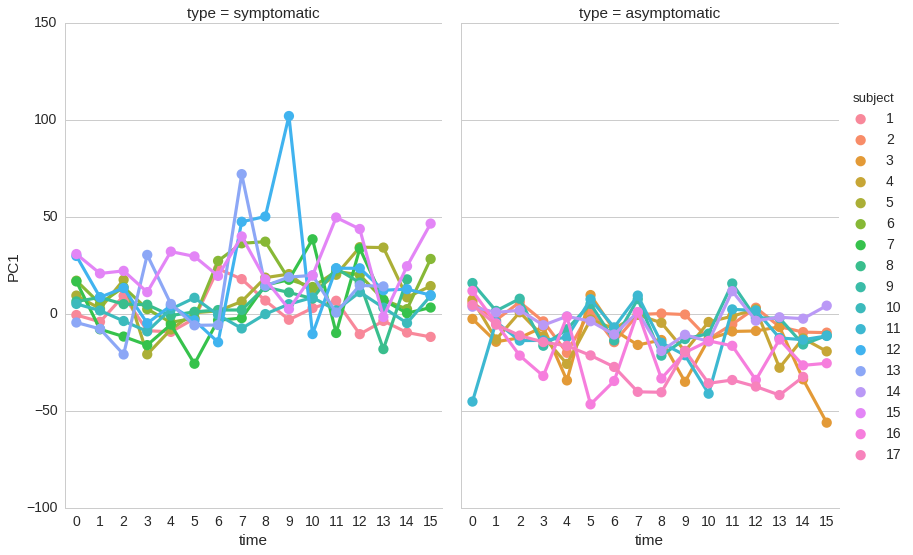

In [114]:
# solution !!
sns.factorplot(x='time',y='PC1',data=data_projected,col='type',hue="subject",size=8,aspect=.75)
plt.show()

What do you see? 

Do the same for the second eigengene.

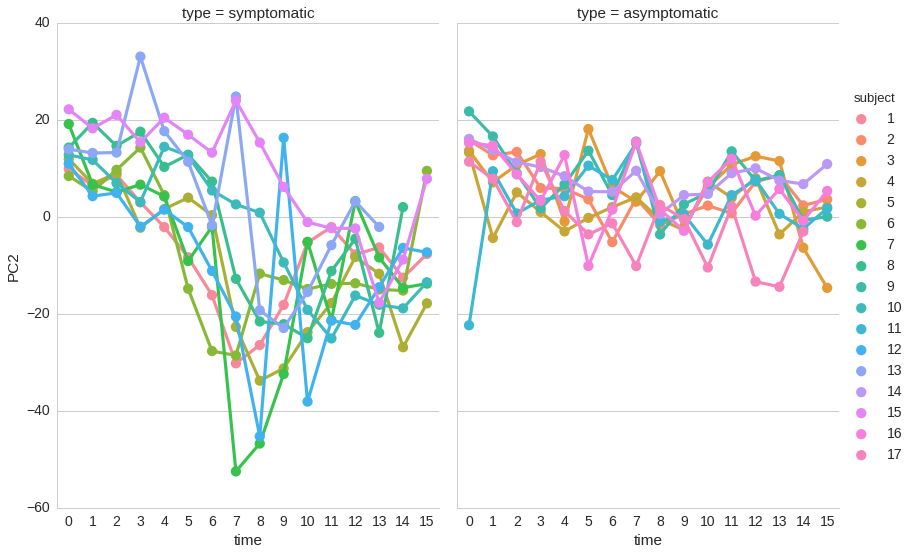

In [111]:
# solution !!
sns.factorplot(x='time',y='PC2',data=data_projected,col='type',hue="subject",size=8,aspect=.75)
plt.show()

What do you see?

Now create the same plot for the first eigengene but remove the coloring by column 'subject'. This will create a sumary plot where each point is the mean value for the first eigengene over all volunteers. The error bars estimate the variation between the volunteers.

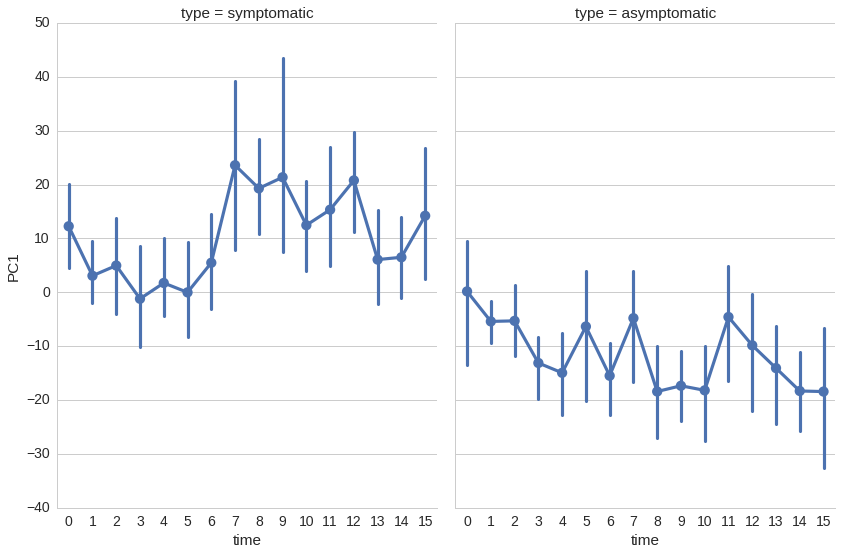

In [112]:
# solution !!
sns.factorplot(x='time',y='PC1',data=data_projected,col='type',size=8,aspect=.75)
plt.show()

Do the same for the second eigengene.

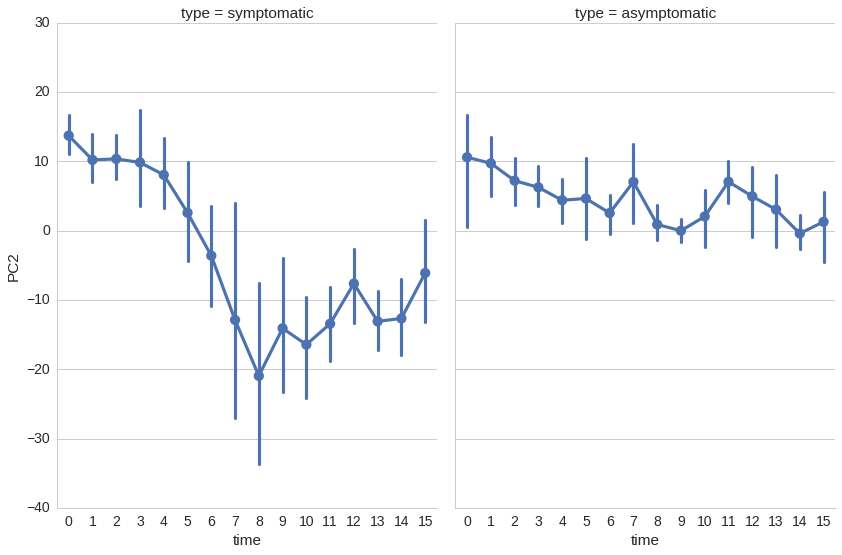

In [131]:
# solution !!
sns.factorplot(x='time',y='PC2',data=data_projected,col='type',size=8,aspect=.75)
plt.show()

In [127]:
tmp = pd.DataFrame()
tmp['genes'] = data.columns.values
tmp['weights'] = np.abs(pca.components_[0])

In [128]:
tmp.head()

,genes,weights
0,10002_at,0.007577
1,10003_at,0.001195
2,10004_at,0.004506
3,10005_at,0.000585
4,10006_at,0.011384


In [130]:
tmp.sort('weights',ascending=False).head()

,genes,weights
11218,91543_at,0.047832
9070,710_at,0.046689
3342,27074_at,0.042310
767,10964_at,0.039760
5012,439992_at,0.039164
